#### Import module

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### import dataset

In [2]:
bike = pd.read_csv("bike_buyers.csv")

In [3]:
bike.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [4]:
bike.shape

(1000, 13)

In [5]:
bike.dtypes

ID                    int64
Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike       object
dtype: object

#### Melihat statistik data

In [6]:
bike.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [7]:
bike.describe(include = "O")

,Marital Status,Gender,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
count,993,989,1000,1000,996,1000,1000,1000
unique,2,2,5,5,2,5,3,2
top,Married,Male,Bachelors,Professional,Yes,0-1 Miles,North America,No
freq,535,500,306,276,682,366,508,519


In [8]:
bike.isnull().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

- **Ada beberapa value yang tidak terisi**

# Handling Missing Value

### 1. Kolom Numerik

#### Cek data outliers

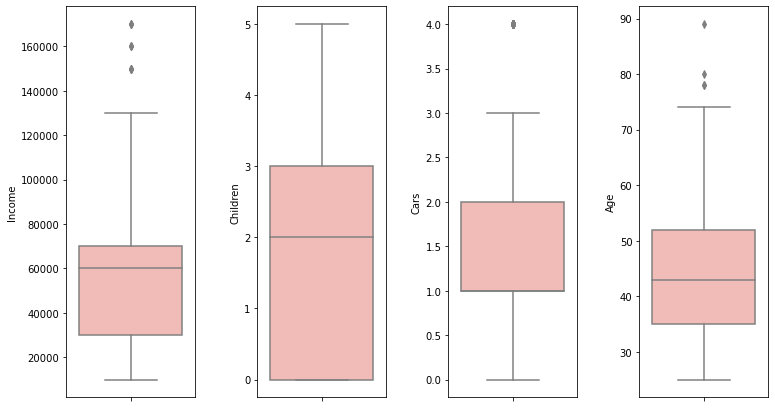

In [9]:
fig, axes = plt.subplots(1, 4, figsize = (11,6.5))
fig.tight_layout(pad = 2.8)
sns.boxplot(y = bike["Income"], palette = "Pastel1", ax = axes[0])
sns.boxplot(y = bike["Children"], palette = "Pastel1", ax = axes[1])
sns.boxplot(y = bike["Cars"], palette = "Pastel1", ax = axes[2])
sns.boxplot(y = bike["Age"], palette = "Pastel1", ax = axes[3])
plt.show()

- **Ada outliers di kolom Income, Cars dan Age**

#### Cek data outliers di kolom Income

In [10]:
bike["Income"].describe()

count       994.000000
mean      56267.605634
std       31067.817462
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Income, dtype: float64

In [11]:
Q1 = 30000
Q3 = 70000

IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)

print("Income")
print("IQR =", IQR)
print("Upper fence =", upper_fence)
print("Lower fence =", lower_fence)

Income
IQR = 40000
Upper fence = 130000.0
Lower fence = -30000.0


In [12]:
bike[(bike["Income"] < lower_fence) | (bike["Income"] > upper_fence)].head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes
12,11434,Married,Male,170000.0,5.0,Partial College,Professional,Yes,NaN,0-1 Miles,Europe,55.0,No
43,17185,Married,Female,170000.0,4.0,Partial College,Professional,No,3.0,5-10 Miles,Europe,48.0,Yes
121,15922,Married,Male,150000.0,2.0,High School,Professional,Yes,4.0,0-1 Miles,Europe,48.0,No
178,14191,Married,Male,160000.0,4.0,Partial College,Professional,No,2.0,10+ Miles,Europe,55.0,Yes


#### Mengisi missing value di kolom Income menggunakan median, karena ada beberapa outliers

In [13]:
bike["Income"].fillna(bike["Income"].median(), inplace = True)

#### Cek data outliers di kolom Cars


In [14]:
bike["Cars"].describe()

count    991.000000
mean       1.455096
std        1.121755
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Cars, dtype: float64

In [15]:
Q1 = 1
Q3 = 2

IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)

print("Cars")
print("IQR =", IQR)
print("upper fence =", upper_fence)
print("lower fence =", lower_fence)

Cars
IQR = 1
upper fence = 3.5
lower fence = -0.5


In [16]:
bike[(bike["Cars"] > upper_fence) | (bike["Cars"] < lower_fence)].head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes
11,12697,Single,Female,90000.0,0.0,Bachelors,Professional,No,4.0,10+ Miles,Pacific,36.0,No
21,21564,Single,Female,80000.0,0.0,Bachelors,Professional,Yes,4.0,10+ Miles,Pacific,35.0,No
51,20619,Single,Male,80000.0,0.0,Bachelors,Professional,No,4.0,10+ Miles,Pacific,35.0,No
57,20567,Married,Male,130000.0,4.0,Partial College,Professional,No,4.0,5-10 Miles,Europe,61.0,Yes


#### Mengisi missing value pada kolom Cars dengan median karena terdapat outliers

In [17]:
bike["Cars"].fillna(bike["Cars"].median(), inplace = True)

#### Cek data outliers di kolom Age

In [18]:
bike["Age"].describe()

count    992.000000
mean      44.181452
std       11.362007
min       25.000000
25%       35.000000
50%       43.000000
75%       52.000000
max       89.000000
Name: Age, dtype: float64

In [19]:
Q1 = 35
Q3 = 52

IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)

print("Age")
print("IQR =",IQR)
print("Upper fence =",upper_fence)
print("Loer fence =",lower_fence)

Age
IQR = 17
Upper fence = 77.5
Loer fence = 9.5


In [20]:
bike[(bike["Age"] > upper_fence) | (bike["Age"] < lower_fence)].head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
250,22931,Married,Male,100000.0,5.0,Graduate Degree,Management,No,1.0,1-2 Miles,Pacific,78.0,Yes
375,15628,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,1.0,0-1 Miles,Europe,89.0,No
401,11555,Married,Female,40000.0,1.0,Bachelors,Clerical,Yes,0.0,0-1 Miles,Europe,80.0,No
595,18058,Single,Female,20000.0,3.0,High School,Skilled Manual,Yes,2.0,2-5 Miles,North America,78.0,No


#### Mengisi missing value pada kolom Age dengan median, karena ada outliers

In [21]:
bike["Age"].fillna(bike["Age"].median(), inplace = True)

#### Mengisi missing value pada kolom Children dengan mean, karena tidak ada outliers

In [22]:
bike["Children"].fillna(bike["Children"].mean(), inplace = True)

### 2. Kolom Kategorik

#### Mengisi missing value pada kolom kategorik dengan modus

##### Martial Status

In [23]:
bike["Marital Status"].describe()

count         993
unique          2
top       Married
freq          535
Name: Marital Status, dtype: object

In [24]:
bike["Marital Status"].fillna("Married", inplace = True)

##### Gender

In [25]:
bike["Gender"].describe()

count      989
unique       2
top       Male
freq       500
Name: Gender, dtype: object

In [26]:
bike["Gender"].fillna("Male", inplace = True)

##### Home Owner

In [27]:
bike["Home Owner"].describe()

count     996
unique      2
top       Yes
freq      682
Name: Home Owner, dtype: object

In [28]:
bike["Home Owner"].fillna("Yes", inplace = True)

In [29]:
bike.isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

- **Sudah tidak ada missing value di dalam data**

### Drop Duplicate

In [30]:
bike.drop_duplicates()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,Male,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
997,11809,Married,Male,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No


In [31]:
print(bike.duplicated().value_counts())

False    1000
dtype: int64


- **Sudah tidak ada data duplikasi**

# Analisa Data

### Numeric

<AxesSubplot:>

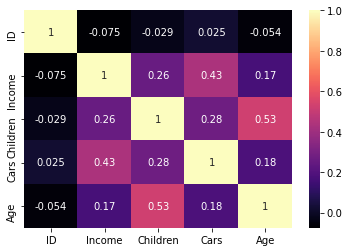

In [32]:
sns.heatmap(bike.corr(), annot = True, cmap = "magma")

In [33]:
purc_bike = bike[bike["Purchased Bike"] == "Yes"]

In [34]:
purc_bike

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
3,24381,Single,Male,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
6,27974,Single,Male,160000.0,2.0,High School,Management,Yes,4.0,0-1 Miles,Pacific,33.0,Yes
7,19364,Married,Male,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,43.0,Yes
9,19280,Married,Male,60000.0,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,43.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,11292,Single,Male,150000.0,1.0,Partial College,Professional,No,3.0,0-1 Miles,North America,44.0,Yes
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
997,11809,Married,Male,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes


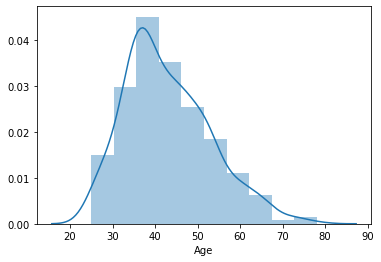

In [35]:
sns.distplot(purc_bike["Age"], bins = 10)

plt.show()

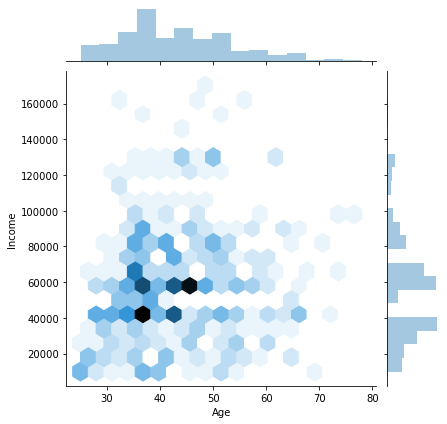

In [36]:
sns.jointplot(x = purc_bike["Age"], y = purc_bike["Income"], kind = "hex")

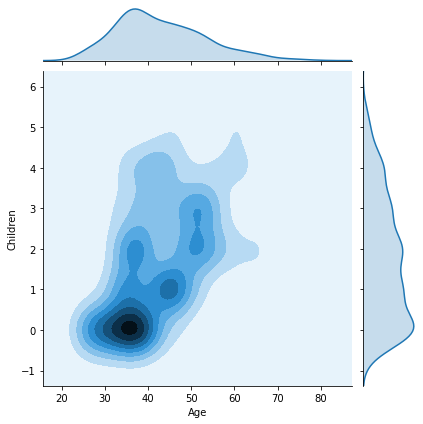

In [37]:
sns.jointplot(x = purc_bike["Age"], y = purc_bike["Children"], kind = "kde")

- **Banyak dari mereka yang membeli sepeda di usia produktif, terbanyak ada di rentang 30-40**

- **Sebagian besar dari mereka membeli sepeda juga karena faktor belum mempunyai anak, sehingga digunakan untuk keperluan sendiri**

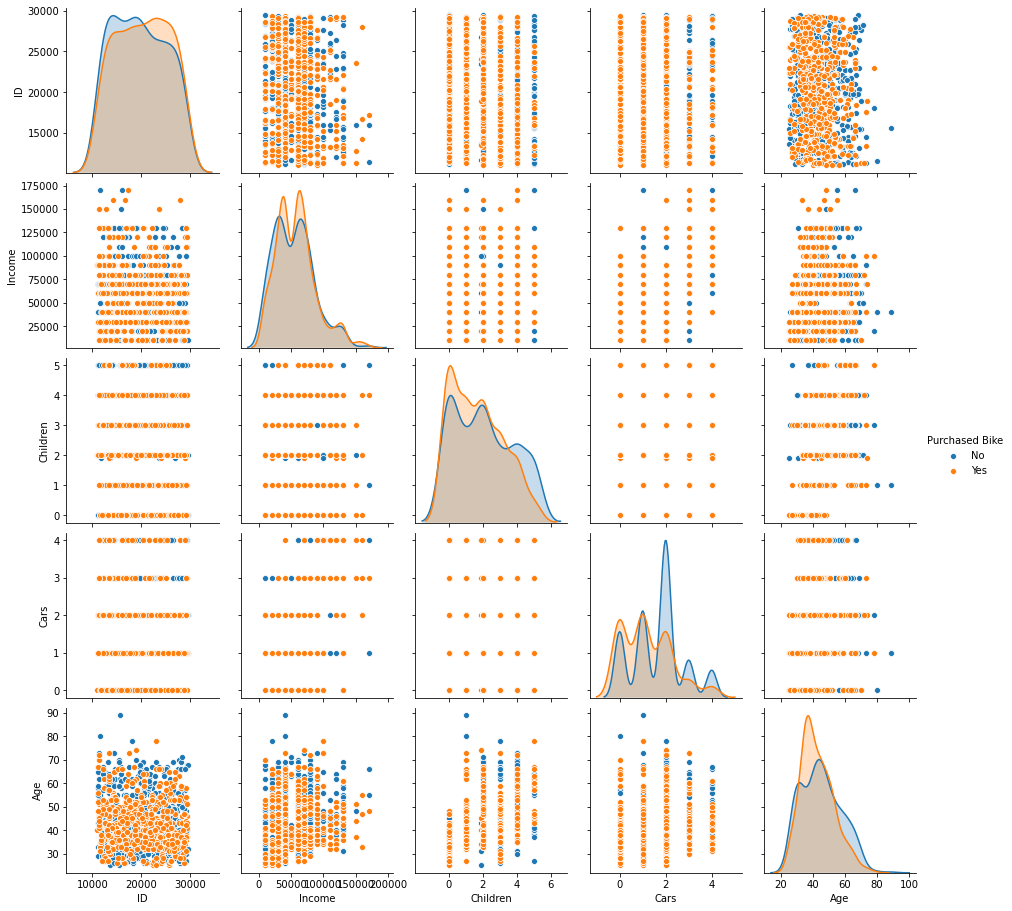

In [38]:
sns.pairplot(bike, hue = "Purchased Bike")

### Categorical

In [39]:
purc_bike["Gender"].value_counts()

Male      242
Female    239
Name: Gender, dtype: int64

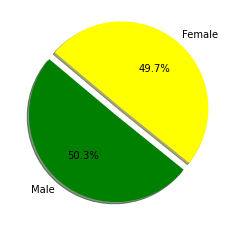

In [40]:
labels = "Male", "Female"
sizes = [242, 239]
explode = (0, 0.1)

plt.pie(sizes, labels = labels, explode = explode,
       autopct = "%1.1f%%",
        shadow = True,
        startangle = 140,
        colors = ["green", "yellow"]
       )
plt.show()

- **Perbandingan antara laki-laki dan perempuan yang membeli sepeda terhitung berbanding sama**

In [41]:
pd.crosstab(index = bike["Purchased Bike"], columns = bike["Marital Status"], normalize = True)*100

Marital Status,Married,Single
Purchased Bike,,
No,30.8,21.1
Yes,23.4,24.7


- **Mereka yang sudah menikah lebih memilih untuk tidak membeli sepeda**

In [54]:
pd.crosstab(index = [bike["Marital Status"], bike["Purchased Bike"]], columns = bike["Children"])

Children                       0.000000  1.000000  1.910282  2.000000  \
Marital Status Purchased Bike                                           
Married        No                    51        51         0        72   
               Yes                   57        69         1        40   
Single         No                    84        21         4        40   
               Yes                   82        28         3        57   

Children                       3.000000  4.000000  5.000000  
Marital Status Purchased Bike                                
Married        No                    36        53        45  
               Yes                   32        28         7  
Single         No                    25        19        18  
               Yes                   40        26        11

In [50]:
bike.pivot_table(index = "Marital Status", columns = ["Purchased Bike"])

Age                 Cars            Children            \
Purchased Bike         No        Yes        No       Yes        No       Yes   
Marital Status                                                                 
Married         48.084416  44.000000  1.652597  1.136752  2.402597  1.683377   
Single          41.312796  41.898785  1.682464  1.299595  1.657067  1.727655   

                          ID                      Income                
Purchased Bike            No           Yes            No           Yes  
Marital Status                                                          
Married         19365.746753  19300.641026  57629.870130  60000.000000  
Single          20128.928910  21205.619433  50853.080569  55748.987854

In [42]:
pd.crosstab(index = purc_bike["Commute Distance"], columns = bike["Occupation"])

Occupation,Clerical,Management,Manual,Professional,Skilled Manual
Commute Distance,,,,,
0-1 Miles,59,23,35,39,44
1-2 Miles,21,12,9,13,22
10+ Miles,0,11,0,20,2
2-5 Miles,3,10,10,49,23
5-10 Miles,5,17,1,29,24


- **Kebanyakan dari mereka membeli sepeda untuk berkendara ke tempat kerja, dengan maksimal jarak 1 miles atau 1.6 km**

In [43]:
pd.crosstab(index = bike["Purchased Bike"], columns = bike["Region"])

Region,Europe,North America,Pacific
Purchased Bike,,,
No,152,288,79
Yes,148,220,113


## Kesimpulan

- **Mereka yang membeli sepeda kebanyakan ada di rentang usia 30-40**
- **Faktor lain karena mereka belum mempunyai anak**
- **Mereka juga membeli sepeda untuk digunakan berangkat ke tempat kerja dengan jarak 1 miles**